In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First is we need to load the dataset in the program.

In [ ]:
from google.colab import drive
drive.mount('drive')

Titanic_data = pd.read_csv('/content/drive/MyDrive/COE 005/Prelim/titanic.csv')
Titanic_data

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


Aftfer loading the dataset, we need to know the dtypes of each column in the dataframe.

In [ ]:
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1310 non-null   float64
 1   survived  1310 non-null   float64
 2   name      1310 non-null   object 
 3   sex       1310 non-null   int64  
 4   age       1310 non-null   float64
 5   sibsp     1310 non-null   float64
 6   parch     1310 non-null   float64
 7   ticket    1310 non-null   object 
 8   cabin     1310 non-null   object 
 9   boat      1310 non-null   object 
 10  body      1310 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 112.7+ KB


Checking the gathered data if there are any null values that need to replace.

In [ ]:
Titanic_data.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

After checking, we need to replace these null values in the column and replace all NaN with 0.

In [ ]:
column_replace = ['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat',
               'body', 'home.dest']

for column in column_replace:
    Titanic_data[column] = Titanic_data[column].replace(np.NaN, 0)

In [ ]:
Titanic_data.isnull().sum()

pclass       0
survived     0
name         0
sex          0
age          0
sibsp        0
parch        0
ticket       0
fare         0
cabin        0
embarked     0
boat         0
body         0
home.dest    0
dtype: int64

After replacing, no more null values in the dataset.

In [ ]:
Titanic_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,2.293130,0.381679,23.859288,0.498473,0.384733,33.244646,14.853435
std,0.839913,0.485984,17.596499,1.041352,0.865295,51.735460,55.177911
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,7.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,24.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


But we also need to consider infos in every column that should not be 0. After describing the dataframe, I have observed that there are zeroes in fare and age. We need to replace it with the mean value.

In [ ]:
column_replace = ['age', 'fare']

for column in column_replace:
   mean = Titanic_data[column].mean()
   Titanic_data[column] = Titanic_data[column].replace(0,mean) 

In [ ]:
Titanic_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000,1310.000000
mean,2.293130,0.381679,28.667571,0.498473,0.384733,33.726821,14.853435
std,0.839913,0.485984,13.103039,1.041352,0.865295,51.577933,55.177911
min,0.000000,0.000000,0.166700,0.000000,0.000000,3.170800,0.000000
25%,2.000000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,0.000000,24.000000,0.000000,0.000000,14.750000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,32.500000,0.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Next is creating histograph for the visulization of dataframe.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6d109487d0>,
      dtype=object)

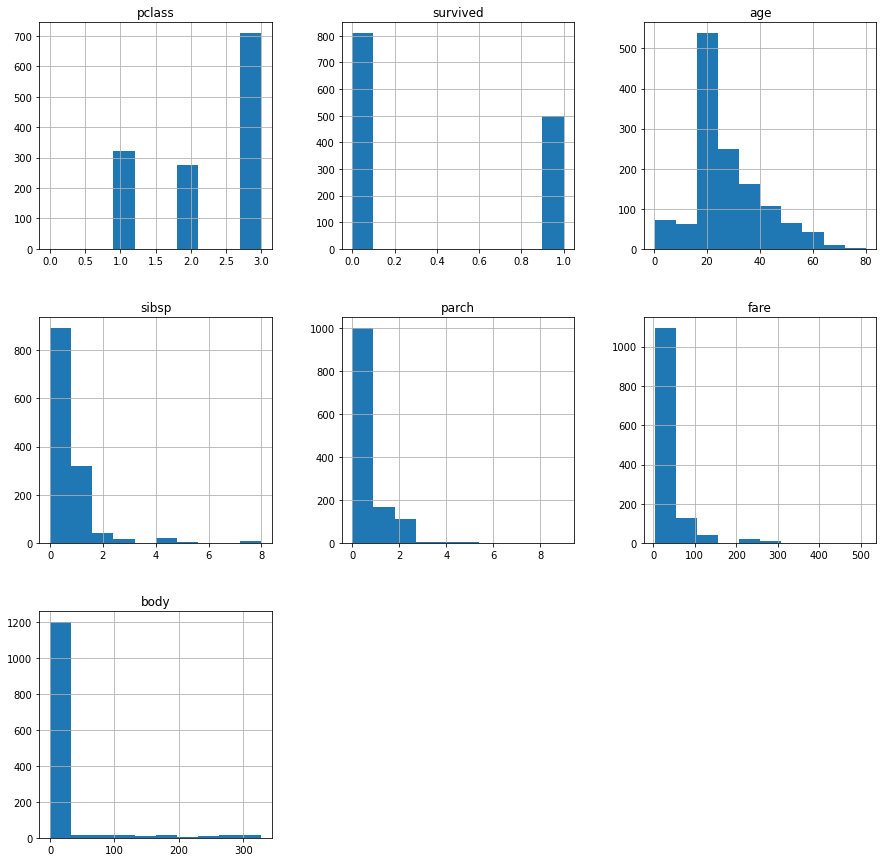

In [ ]:
Titanic_data.hist(figsize=(15,15))

Next is dropping columns that are unnecessary in creating predcitive analysis.

In [ ]:
Titanic_data = Titanic_data.drop('home.dest', axis=1)

In [ ]:
Titanic_data = Titanic_data.drop('embarked', axis=1)

In [ ]:
Titanic_data = Titanic_data.drop('fare', axis=1)

In [ ]:
Titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,cabin,boat,body
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,B5,2,0.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,C22 C26,11,0.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,C22 C26,0,0.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,C22 C26,0,135.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,C22 C26,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,23.859288,1.0,0.0,2665,0,0,0.0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.500000,0.0,0.0,2656,0,0,304.0
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.000000,0.0,0.0,2670,0,0,0.0
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.000000,0.0,0.0,315082,0,0,0.0


Next is knowing the count of each data in datafram. Expecially in gender and the number of survivors.

In [ ]:
print(Titanic_data['sex'].value_counts())

male      843
female    466
0           1
Name: sex, dtype: int64


In [ ]:
print(Titanic_data['survived'].value_counts())

0.0    810
1.0    500
Name: survived, dtype: int64


I have used a dataset that only has a total of 1310 passengers. 

In [ ]:
Titanic_data['sex'].replace(['female', 'male'],
                        [0, 1], inplace=True)

We need to replace the dtype of the genders in the datafram so we can use it in our predictive analysis.

In [ ]:
Titanic_data

,pclass,survived,name,sex,age,sibsp,parch,ticket,cabin,boat,body
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0,29.000000,0.0,0.0,24160,B5,2,0.0
1,1.0,1.0,"Allison, Master. Hudson Trevor",1,0.916700,1.0,2.0,113781,C22 C26,11,0.0
2,1.0,0.0,"Allison, Miss. Helen Loraine",0,2.000000,1.0,2.0,113781,C22 C26,0,0.0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1,30.000000,1.0,2.0,113781,C22 C26,0,135.0
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.000000,1.0,2.0,113781,C22 C26,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",0,23.859288,1.0,0.0,2665,0,0,0.0
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",1,26.500000,0.0,0.0,2656,0,0,304.0
1307,3.0,0.0,"Zakarian, Mr. Ortin",1,27.000000,0.0,0.0,2670,0,0,0.0
1308,3.0,0.0,"Zimmerman, Mr. Leo",1,29.000000,0.0,0.0,315082,0,0,0.0


# **`Linear Regression Model`**

First model I decided to use is linear regression model. I could use different data visualization to see the correlation of these data to the predicted outcome of passengers. But I opted to go directly to  using the different models and just initially assume the factors that can affect the predicted outcome of the survivors.

In [ ]:
y = Titanic_data["survived"]
x = Titanic_data[["age", "pclass", "sex"]]
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.025, random_state = 42)

For the three models, I have chosen the age, passenger class and gender of the passengers as factors that can affect their predicted outcome. Ideally, 0.025 is the recommended test size for all predictive analysis so I use the same number in my program.

In [ ]:
regression = LinearRegression().fit(x_train, y_train)

In [ ]:
regression.coef_

array([-0.0048159 , -0.17259199, -0.48932761])

In [ ]:
regression.intercept_

1.2298708992911473

In [ ]:
from sklearn.feature_selection import mutual_info_regression 

def make_mi_scores(x, y):
  mi_scores = mutual_info_regression(x, y, discrete_features=False)
  mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
  mi_scores = mi_scores.sort_values(ascending=False)
  return mi_scores

mi_scores = make_mi_scores(x_train, y_train)

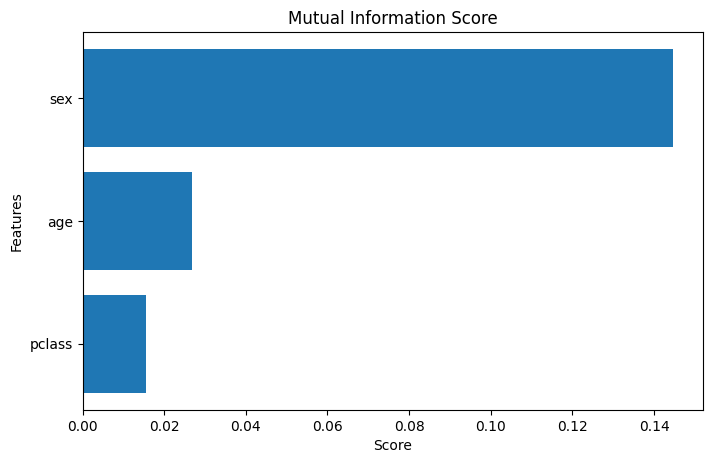

In [ ]:
def plot_mi_scores(scores):
  y = scores.sort_values(ascending=True)
  width = np.arange(len(y))
  ticks = list(y.index)
  plt.barh(width, y)
  plt.yticks(width, ticks)
  plt.title("Mutual Information Score")

plt.figure(dpi=100, figsize=(8,5))
plt.xlabel("Score")
plt.ylabel("Features")
plot_mi_scores(mi_scores)

In [ ]:
tnc_suv = Titanic_data[['survived', 'sex']].groupby(['sex']).count()
print(tnc_suv)

     survived
sex          
0         467
1         843


Above, Ihave observed in MIS that sex is the most dependent factor that can affect the outcome of these passengers. There were more male survivors that were recorded in the dataset that I have used.

In [ ]:
x_test

,age,pclass,sex
701,17.000000,3.0,1
994,23.859288,3.0,1
350,15.000000,2.0,0
986,22.000000,3.0,1
409,36.000000,2.0,1
917,39.000000,3.0,1
905,32.000000,3.0,1
1117,21.000000,3.0,1
1168,23.859288,3.0,1
344,19.000000,2.0,0


In [ ]:
x_train

,age,pclass,sex
811,48.000000,3.0,0
115,64.000000,1.0,1
867,22.000000,3.0,0
1268,23.859288,3.0,1
744,19.000000,3.0,1
...,...,...,...
1095,23.859288,3.0,0
1130,18.000000,3.0,0
1294,28.500000,3.0,1
860,26.000000,3.0,0


In [ ]:
regression = LinearRegression().fit(x_train, y_train)

In [ ]:
from sklearn.metrics import mean_squared_error 

y_test_pred = regression.predict(x_test)
y_train_pred = regression.predict(x_train)
test_MSE = mean_squared_error(y_test, y_test_pred)
train_MSE = mean_squared_error(y_train, y_train_pred)
print(f'Test error is {test_MSE}\nTrain error is {train_MSE}')

Test error is 0.13605575854603433
Train error is 0.1535474709278695


The test error is 13.6% and train error is 15.3%. This is kind of acceptable percentage error in my opinion.

# **`Decision Tree Analysis`**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

y = Titanic_data["survived"]
X = Titanic_data[["age", "pclass", "sex"]]

In the second model I used, I chose the same factors for predicting the outcome of passengers.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

I have used a different test size for this second model.

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.7938931297709924


It resulted to also acceptable percentage accuracy which is 79.39%.

#**`Neural Networks`**

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [ ]:
Tnc_NN = Titanic_data

In [ ]:
Y = Titanic_data["survived"]
X = Titanic_data[["age", "pclass", "sex"]]
print(X)

            age  pclass  sex
0     29.000000     1.0    0
1      0.916700     1.0    1
2      2.000000     1.0    0
3     30.000000     1.0    1
4     25.000000     1.0    0
...         ...     ...  ...
1305  23.859288     3.0    0
1306  26.500000     3.0    1
1307  27.000000     3.0    1
1308  29.000000     3.0    1
1309  23.859288     0.0    0

[1310 rows x 3 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

Also different test size from the different prior models that were used.

Next is performing feature scaling using standardization.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Next is creating ann object using a class of keras named sequential.

In [ ]:
ann = tf.keras.models.Sequential()

Next is creating the first and second hidden layer, then the output layer.

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

Compile all the created layers in our neural network.

In [ ]:
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

Lastly is fitting the training dataset and figure the percentage accuracy of using neural network for predictive analysis.

In [ ]:
ann.fit(X_train,Y_train,batch_size=32,epochs = 100)

Epoch 1/100
33/33 [==============================] - 1s 2ms/step - loss: 0.7192 - accuracy: 0.3626
Epoch 2/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6902 - accuracy: 0.5983
Epoch 3/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6450
Epoch 4/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6493 - accuracy: 0.6689
Epoch 5/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6310 - accuracy: 0.6794
Epoch 6/100
33/33 [==============================] - 0s 2ms/step - loss: 0.6118 - accuracy: 0.6899
Epoch 7/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5886 - accuracy: 0.7042
Epoch 8/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.7147
Epoch 9/100
33/33 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7376
Epoch 10/100
33/33 [==============================] - 0s 3ms/step - loss: 0.5290 - accuracy: 0.7519
Epoch 11/

ANd the percentage accuracy for nueral network is 80%. Also a high number.

##`Conclusion`##

In all the three models that I used, it gave a righ amount of percentage error and accuracy for the variables I used in predicting the outcome of passengers. Linear aggression is the easier model for me to use since I have learned using it in my previous course elective. It's also good to learn other models that I can use in my future projects that require prediction outcomes.

I have chosen or assumed the variables that can affect the passengers outcome which are their age, passenger class, and genders. And all the three models used concluded that they really affect the outcome of the passengers. More men survived in this dataset which only has a record of 1310 passengers. Knowing the right amount of test size and train size can also affect the percentage accuracy and error of the whole prediction.